# Kaggle competition info

## Overview
Welcome to the 2025 Kaggle Playground Series! We plan to continue in the spirit of previous playgrounds, providing interesting and approachable datasets for our community to practice their machine learning skills, and anticipate a competition each month.

**Your Goal:** Predict the probability that a patient will be diagnosed with diabetes.

**Link**: <https://www.kaggle.com/competitions/playground-series-s5e12/overview>


In [1]:
# !pip install -q xgboost lightgbm catboost

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



import os, time

import seaborn as sns

import matplotlib.pyplot as plt


from sklearn import metrics

from sklearn.model_selection import KFold, StratifiedKFold, train_test_split

from sklearn.metrics import (accuracy_score, confusion_matrix, 
                             classification_report ,  ConfusionMatrixDisplay, 
                             roc_curve,  roc_auc_score)




# model
import xgboost as xgb
import lightgbm as lgb
import catboost as cb


In [3]:
class CFG:

    trainFile = "/kaggle/input/playground-series-s5e12/train.csv"
    testFile = "/kaggle/input/playground-series-s5e12/test.csv"
    sampleFile = "/kaggle/input/playground-series-s5e12/test.csv"
    targetCol = "diagnosed_diabetes"
    idCol = "id"
    

In [4]:
def printAllcolumnsValue(df, showAll=True):
    for col in df.columns:
        if showAll :
            print(f"{col} : {df[col].unique()}") # print unique value
        else: # only print catergory column
            if df[col].dtype == "object":
                print(f"{col} : {df[col].unique()}") # print unique value

In [5]:
trainDF = pd.read_csv(CFG.trainFile)
trainDF

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,...,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
0,0,31,1,45,7.7,6.8,6.1,33.4,0.93,112,...,Female,Hispanic,Highschool,Lower-Middle,Current,Employed,0,0,0,1.0
1,1,50,2,73,5.7,6.5,5.8,23.8,0.83,120,...,Female,White,Highschool,Upper-Middle,Never,Employed,0,0,0,1.0
2,2,32,3,158,8.5,7.4,9.1,24.1,0.83,95,...,Male,Hispanic,Highschool,Lower-Middle,Never,Retired,0,0,0,0.0
3,3,54,3,77,4.6,7.0,9.2,26.6,0.83,121,...,Female,White,Highschool,Lower-Middle,Current,Employed,0,1,0,1.0
4,4,54,1,55,5.7,6.2,5.1,28.8,0.90,108,...,Male,White,Highschool,Upper-Middle,Never,Retired,0,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699995,699995,29,1,59,6.9,5.2,1.5,26.1,0.88,133,...,Female,Hispanic,Postgraduate,Upper-Middle,Former,Employed,0,0,0,0.0
699996,699996,46,2,72,7.7,7.7,3.8,25.5,0.85,106,...,Female,Hispanic,Graduate,Upper-Middle,Former,Employed,0,0,1,1.0
699997,699997,35,1,50,5.6,6.1,6.4,26.9,0.88,127,...,Female,White,Graduate,Middle,Never,Employed,0,0,0,1.0
699998,699998,49,2,70,5.7,6.9,4.7,25.2,0.86,116,...,Female,White,Highschool,Lower-Middle,Never,Retired,0,0,0,1.0


In [6]:
trainDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 26 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   id                                  700000 non-null  int64  
 1   age                                 700000 non-null  int64  
 2   alcohol_consumption_per_week        700000 non-null  int64  
 3   physical_activity_minutes_per_week  700000 non-null  int64  
 4   diet_score                          700000 non-null  float64
 5   sleep_hours_per_day                 700000 non-null  float64
 6   screen_time_hours_per_day           700000 non-null  float64
 7   bmi                                 700000 non-null  float64
 8   waist_to_hip_ratio                  700000 non-null  float64
 9   systolic_bp                         700000 non-null  int64  
 10  diastolic_bp                        700000 non-null  int64  
 11  heart_rate                

In [7]:
trainDF.isnull().sum() # check Null 

id                                    0
age                                   0
alcohol_consumption_per_week          0
physical_activity_minutes_per_week    0
diet_score                            0
sleep_hours_per_day                   0
screen_time_hours_per_day             0
bmi                                   0
waist_to_hip_ratio                    0
systolic_bp                           0
diastolic_bp                          0
heart_rate                            0
cholesterol_total                     0
hdl_cholesterol                       0
ldl_cholesterol                       0
triglycerides                         0
gender                                0
ethnicity                             0
education_level                       0
income_level                          0
smoking_status                        0
employment_status                     0
family_history_diabetes               0
hypertension_history                  0
cardiovascular_history                0


In [8]:
testDF = pd.read_csv(CFG.testFile)
testDF

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,...,triglycerides,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history
0,700000,45,4,100,4.3,6.8,6.2,25.5,0.84,123,...,111,Female,White,Highschool,Middle,Former,Employed,0,0,0
1,700001,35,1,87,3.5,4.6,9.0,28.6,0.88,120,...,145,Female,White,Highschool,Middle,Never,Unemployed,0,0,0
2,700002,45,1,61,7.6,6.8,7.0,28.5,0.94,112,...,184,Male,White,Highschool,Low,Never,Employed,0,0,0
3,700003,55,2,81,7.3,7.3,5.0,26.9,0.91,114,...,128,Male,White,Graduate,Middle,Former,Employed,0,0,0
4,700004,77,2,29,7.3,7.6,8.5,22.0,0.83,131,...,133,Male,White,Graduate,Low,Current,Unemployed,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,999995,59,3,185,6.3,7.3,4.4,22.8,0.81,108,...,126,Male,White,Highschool,Upper-Middle,Former,Employed,1,0,0
299996,999996,50,2,25,5.8,7.8,4.5,29.6,0.93,112,...,112,Male,Asian,Postgraduate,Lower-Middle,Never,Employed,0,0,0
299997,999997,63,1,252,5.2,7.5,8.5,25.1,0.77,129,...,135,Female,White,Highschool,Middle,Never,Employed,0,0,0
299998,999998,48,3,72,4.9,6.9,1.8,27.7,0.89,121,...,138,Male,White,Highschool,Low,Current,Retired,0,1,0


In [9]:
submit = pd.read_csv(CFG.sampleFile)
submit

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,...,triglycerides,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history
0,700000,45,4,100,4.3,6.8,6.2,25.5,0.84,123,...,111,Female,White,Highschool,Middle,Former,Employed,0,0,0
1,700001,35,1,87,3.5,4.6,9.0,28.6,0.88,120,...,145,Female,White,Highschool,Middle,Never,Unemployed,0,0,0
2,700002,45,1,61,7.6,6.8,7.0,28.5,0.94,112,...,184,Male,White,Highschool,Low,Never,Employed,0,0,0
3,700003,55,2,81,7.3,7.3,5.0,26.9,0.91,114,...,128,Male,White,Graduate,Middle,Former,Employed,0,0,0
4,700004,77,2,29,7.3,7.6,8.5,22.0,0.83,131,...,133,Male,White,Graduate,Low,Current,Unemployed,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,999995,59,3,185,6.3,7.3,4.4,22.8,0.81,108,...,126,Male,White,Highschool,Upper-Middle,Former,Employed,1,0,0
299996,999996,50,2,25,5.8,7.8,4.5,29.6,0.93,112,...,112,Male,Asian,Postgraduate,Lower-Middle,Never,Employed,0,0,0
299997,999997,63,1,252,5.2,7.5,8.5,25.1,0.77,129,...,135,Female,White,Highschool,Middle,Never,Employed,0,0,0
299998,999998,48,3,72,4.9,6.9,1.8,27.7,0.89,121,...,138,Male,White,Highschool,Low,Current,Retired,0,1,0


In [10]:
testDF.isnull().sum() # check Null 

id                                    0
age                                   0
alcohol_consumption_per_week          0
physical_activity_minutes_per_week    0
diet_score                            0
sleep_hours_per_day                   0
screen_time_hours_per_day             0
bmi                                   0
waist_to_hip_ratio                    0
systolic_bp                           0
diastolic_bp                          0
heart_rate                            0
cholesterol_total                     0
hdl_cholesterol                       0
ldl_cholesterol                       0
triglycerides                         0
gender                                0
ethnicity                             0
education_level                       0
income_level                          0
smoking_status                        0
employment_status                     0
family_history_diabetes               0
hypertension_history                  0
cardiovascular_history                0


In [11]:
trainDF.columns

Index(['id', 'age', 'alcohol_consumption_per_week',
       'physical_activity_minutes_per_week', 'diet_score',
       'sleep_hours_per_day', 'screen_time_hours_per_day', 'bmi',
       'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate',
       'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol',
       'triglycerides', 'gender', 'ethnicity', 'education_level',
       'income_level', 'smoking_status', 'employment_status',
       'family_history_diabetes', 'hypertension_history',
       'cardiovascular_history', 'diagnosed_diabetes'],
      dtype='object')

In [12]:
testDF.columns

Index(['id', 'age', 'alcohol_consumption_per_week',
       'physical_activity_minutes_per_week', 'diet_score',
       'sleep_hours_per_day', 'screen_time_hours_per_day', 'bmi',
       'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate',
       'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol',
       'triglycerides', 'gender', 'ethnicity', 'education_level',
       'income_level', 'smoking_status', 'employment_status',
       'family_history_diabetes', 'hypertension_history',
       'cardiovascular_history'],
      dtype='object')

# Data preprocessing 

In [13]:

printAllcolumnsValue(trainDF, showAll=False)

gender : ['Female' 'Male' 'Other']
ethnicity : ['Hispanic' 'White' 'Asian' 'Black' 'Other']
education_level : ['Highschool' 'Graduate' 'Postgraduate' 'No formal']
income_level : ['Lower-Middle' 'Upper-Middle' 'Low' 'Middle' 'High']
smoking_status : ['Current' 'Never' 'Former']
employment_status : ['Employed' 'Retired' 'Student' 'Unemployed']


In [14]:
printAllcolumnsValue(testDF, showAll=False)

gender : ['Female' 'Male' 'Other']
ethnicity : ['White' 'Hispanic' 'Black' 'Asian' 'Other']
education_level : ['Highschool' 'Graduate' 'Postgraduate' 'No formal']
income_level : ['Middle' 'Low' 'Lower-Middle' 'Upper-Middle' 'High']
smoking_status : ['Former' 'Never' 'Current']
employment_status : ['Employed' 'Unemployed' 'Retired' 'Student']


In [15]:
# Ordinal mappings each catergoy into numberic representation
genderMap = {"Female": 0, "Male": 1,  "Other": 2}
ethnicityMap = {"Hispanic": 0 , "White": 1, "Asian": 2, "Black": 3, "Other": 4}
eduLvlMap = {"Highschool": 0, "Graduate":1 , "Postgraduate": 2, "No formal": 3}
incomeLvlMap = {"Lower-Middle": 0 , "Upper-Middle":1 , "Low":2 , "Middle": 3, "High": 4}
smokingMap = {"Never": 0, "Current": 1,  "Former": 2}
employmentMap = {"Employed": 0,  "Retired": 1, "Student": 2,  "Unemployed": 3}

In [16]:
def cleanData(df):
    tempDF = df.copy()
    
    # convert catergoy into numberic column
    tempDF["gender"]= tempDF["gender"].map(genderMap)
    tempDF["ethnicity"]= tempDF["ethnicity"].map(ethnicityMap)
    tempDF["education_level"]= tempDF["education_level"].map(eduLvlMap)
    tempDF["income_level"] = tempDF["income_level"].map(incomeLvlMap)
    tempDF["employment_status"] = tempDF["employment_status"].map(employmentMap)
    tempDF["smoking_status"]= tempDF["smoking_status"].map(smokingMap)
    print(tempDF.head(5))
    print(tempDF.isnull().sum()) 
    return tempDF
    

In [17]:
def featureEngineering(df):
    tempDF = df.copy()
    
    tempDF['MAP'] = (tempDF['systolic_bp'] + 2 * tempDF['diastolic_bp']) / 3 # Mean Arterial Pressure
    tempDF['Pulse_Pressure'] = tempDF['systolic_bp'] - tempDF['diastolic_bp'] 
    tempDF["Non_HDL"] = tempDF["cholesterol_total"] - tempDF["hdl_cholesterol"]
    tempDF["Total_HDL_Ratio"] = tempDF["cholesterol_total"] / (tempDF["hdl_cholesterol"] + 1e-5)
    tempDF["TG_HDL_Ratio"]= tempDF["triglycerides"] / (tempDF["hdl_cholesterol"] + 1e-5)

    tempDF["Metabolic_Syndrome_Index"] = tempDF["bmi"] * tempDF["waist_to_hip_ratio"] # MSI index 
    daily_activity_hr = (tempDF["physical_activity_minutes_per_week"]/7)/60 # daily activity per hour
    tempDF["Active_Balance"]= daily_activity_hr - tempDF["screen_time_hours_per_day"]

    return tempDF
    

In [18]:
# clean train data
trainDF = cleanData(trainDF)

   id  age  alcohol_consumption_per_week  physical_activity_minutes_per_week  \
0   0   31                             1                                  45   
1   1   50                             2                                  73   
2   2   32                             3                                 158   
3   3   54                             3                                  77   
4   4   54                             1                                  55   

   diet_score  sleep_hours_per_day  screen_time_hours_per_day   bmi  \
0         7.7                  6.8                        6.1  33.4   
1         5.7                  6.5                        5.8  23.8   
2         8.5                  7.4                        9.1  24.1   
3         4.6                  7.0                        9.2  26.6   
4         5.7                  6.2                        5.1  28.8   

   waist_to_hip_ratio  systolic_bp  ...  gender  ethnicity  education_level  \
0            

In [19]:
# Clean test data
testDF = cleanData(testDF)

       id  age  alcohol_consumption_per_week  \
0  700000   45                             4   
1  700001   35                             1   
2  700002   45                             1   
3  700003   55                             2   
4  700004   77                             2   

   physical_activity_minutes_per_week  diet_score  sleep_hours_per_day  \
0                                 100         4.3                  6.8   
1                                  87         3.5                  4.6   
2                                  61         7.6                  6.8   
3                                  81         7.3                  7.3   
4                                  29         7.3                  7.6   

   screen_time_hours_per_day   bmi  waist_to_hip_ratio  systolic_bp  ...  \
0                        6.2  25.5                0.84          123  ...   
1                        9.0  28.6                0.88          120  ...   
2                        7.0  28.5    

In [20]:
trainDF = featureEngineering(trainDF)

In [21]:
trainDF

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,...,hypertension_history,cardiovascular_history,diagnosed_diabetes,MAP,Pulse_Pressure,Non_HDL,Total_HDL_Ratio,TG_HDL_Ratio,Metabolic_Syndrome_Index,Active_Balance
0,0,31,1,45,7.7,6.8,6.1,33.4,0.93,112,...,0,0,1.0,84.000000,42,141,3.431034,1.758620,31.062,-5.992857
1,1,50,2,73,5.7,6.5,5.8,23.8,0.83,120,...,0,0,1.0,91.333333,43,149,3.979999,2.480000,19.754,-5.626190
2,2,32,3,158,8.5,7.4,9.1,24.1,0.83,95,...,0,0,0.0,91.000000,6,129,3.186440,1.830508,20.003,-8.723810
3,3,54,3,77,4.6,7.0,9.2,26.6,0.83,121,...,1,0,1.0,86.333333,52,128,3.370370,2.277777,22.078,-9.016667
4,4,54,1,55,5.7,6.2,5.1,28.8,0.90,108,...,1,0,1.0,76.000000,48,157,4.204081,2.530612,25.920,-4.969048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699995,699995,29,1,59,6.9,5.2,1.5,26.1,0.88,133,...,0,0,0.0,82.333333,76,105,2.810344,2.172413,22.968,-1.359524
699996,699996,46,2,72,7.7,7.7,3.8,25.5,0.85,106,...,0,1,1.0,92.000000,21,143,4.177777,2.644444,21.675,-3.628571
699997,699997,35,1,50,5.6,6.1,6.4,26.9,0.88,127,...,0,0,1.0,98.333333,43,109,2.847457,2.813559,23.672,-6.280952
699998,699998,49,2,70,5.7,6.9,4.7,25.2,0.86,116,...,0,0,1.0,83.333333,49,143,3.599999,2.418181,21.672,-4.533333


In [22]:
testDF = featureEngineering(testDF)

In [23]:
testDF

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,...,family_history_diabetes,hypertension_history,cardiovascular_history,MAP,Pulse_Pressure,Non_HDL,Total_HDL_Ratio,TG_HDL_Ratio,Metabolic_Syndrome_Index,Active_Balance
0,700000,45,4,100,4.3,6.8,6.2,25.5,0.84,123,...,0,0,0,87.666667,53,154,3.799999,2.018181,21.420,-5.961905
1,700001,35,1,87,3.5,4.6,9.0,28.6,0.88,120,...,0,0,0,89.333333,46,112,3.382978,3.085106,25.168,-8.792857
2,700002,45,1,61,7.6,6.8,7.0,28.5,0.94,112,...,0,0,0,84.666667,41,130,4.023255,4.279069,26.790,-6.854762
3,700003,55,2,81,7.3,7.3,5.0,26.9,0.91,114,...,0,0,0,92.000000,33,144,3.440677,2.169491,24.479,-4.807143
4,700004,77,2,29,7.3,7.6,8.5,22.0,0.83,131,...,0,0,0,95.666667,53,118,2.999999,2.254237,18.260,-8.430952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,999995,59,3,185,6.3,7.3,4.4,22.8,0.81,108,...,1,0,0,86.000000,33,135,3.499999,2.333333,18.468,-3.959524
299996,999996,50,2,25,5.8,7.8,4.5,29.6,0.93,112,...,0,0,0,84.000000,42,115,3.674418,2.604651,27.528,-4.440476
299997,999997,63,1,252,5.2,7.5,8.5,25.1,0.77,129,...,0,0,0,85.000000,66,135,5.090908,4.090908,19.327,-7.900000
299998,999998,48,3,72,4.9,6.9,1.8,27.7,0.89,121,...,0,1,0,85.000000,54,121,3.419999,2.759999,24.653,-1.628571


In [24]:
trainDF["family_history_diabetes"].value_counts()

family_history_diabetes
0    595419
1    104581
Name: count, dtype: int64

In [25]:
trainDF["hypertension_history"].value_counts()

hypertension_history
0    572607
1    127393
Name: count, dtype: int64

In [26]:
trainDF["cardiovascular_history"].value_counts()

cardiovascular_history
0    678773
1     21227
Name: count, dtype: int64

In [27]:
trainDF.describe()

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,...,hypertension_history,cardiovascular_history,diagnosed_diabetes,MAP,Pulse_Pressure,Non_HDL,Total_HDL_Ratio,TG_HDL_Ratio,Metabolic_Syndrome_Index,Active_Balance
count,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,...,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000
mean,349999.500000,50.359734,2.072411,80.230803,5.963695,7.002200,6.012733,25.874684,0.858766,116.294193,...,0.181990,0.030324,0.623296,89.058680,40.853269,132.995587,3.556875,2.352618,22.302564,-5.821707
std,202072.738554,11.655520,1.048189,51.195071,1.463336,0.901907,2.022707,2.860705,0.037980,11.010390,...,0.385837,0.171478,0.484560,6.214235,12.159006,18.249329,0.661723,0.651447,3.270597,2.026163
min,0.000000,19.000000,1.000000,1.000000,0.100000,3.100000,0.600000,15.100000,0.680000,91.000000,...,0.000000,0.000000,0.000000,64.666667,-4.000000,62.000000,1.849315,0.378049,10.626000,-16.419048
25%,174999.750000,42.000000,1.000000,49.000000,5.000000,6.400000,4.600000,23.900000,0.830000,108.000000,...,0.000000,0.000000,0.000000,84.666667,32.000000,120.000000,3.089552,1.909091,20.038000,-7.200000
50%,349999.500000,50.000000,2.000000,71.000000,6.000000,7.000000,6.000000,25.900000,0.860000,116.000000,...,0.000000,0.000000,1.000000,89.000000,41.000000,133.000000,3.462962,2.274509,22.185000,-5.792857
75%,524999.250000,58.000000,3.000000,96.000000,7.000000,7.600000,7.400000,27.800000,0.880000,124.000000,...,0.000000,0.000000,1.000000,93.333333,49.000000,146.000000,3.919999,2.706896,24.447000,-4.407143
max,699999.000000,89.000000,9.000000,747.000000,9.900000,9.900000,16.500000,38.400000,1.050000,163.000000,...,1.000000,1.000000,1.000000,117.333333,95.000000,253.000000,10.954540,8.111108,38.582000,0.359524


# EDA

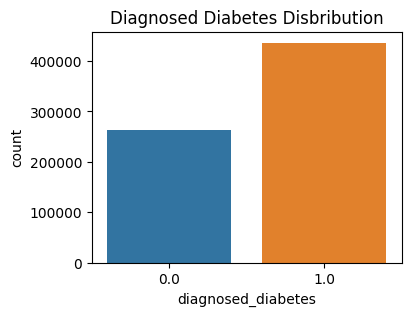

In [28]:
# trainDF[CFG.targetCol].astype(int).value_counts().plot(kind="bar", title="Diagnosed Diabetes Class");
plt.figure(figsize=(4,3))
sns.countplot(data=trainDF, x=CFG.targetCol)
plt.title("Diagnosed Diabetes Disbribution")
plt.show()


In [35]:
len(trainDF)

700000

In [36]:
majorClassCount = trainDF[CFG.targetCol].value_counts().max()
majorClassCount

436307

<!-- ### Undersampling is simple way to reduce impact for training imbalance class -->
# Imbalance Class Handling
To address the extreme class imbalance in your training dataset, you can apply sampling techniques to create a more balanced dataset for fine-tuning. Here are common and effective approaches:

### Undersampling the Majority Classes
Randomly remove samples from highly frequent classes to reduce their dominance.

Techniques like Near Miss or Tomek Links select majority samples close to minority samples to keep important points and remove redundant ones.

Downsampling ensures batches contain more representative samples of minority classes, helping the model learn minority patterns better.

### Oversampling the Minority Classes
Increase the number of samples in minority classes by replicating existing samples or synthetically generating new ones (e.g., SMOTE or Perceptual Borderline SMOTE).

Synthetic oversampling creates new minority samples by interpolating between nearest neighbors, improving representation without losing information.

### Hybrid Sampling
Combine undersampling and oversampling to balance the dataset effectively without losing valuable majority class information.

For example, reduce majority class samples moderately and apply synthetic oversampling to minority classes.

Hybrid methods have been shown to perform well in highly imbalanced multi-class settings.

## Additional Suggestions
- Class Weights: Alternatively or additionally, assign higher loss weights to minority classes during training to force the model to pay more attention to them without changing the dataset distribution.

- Experiment: It’s important to experiment with the degree of under- and oversampling as well as weighting to optimize balanced learning.


By applying these resampling strategies, the data balance improves, which can help stabilize metrics like mAP during fine-tuning and improve overall model robustness across all classes.To address the extreme class imbalance in your training dataset, a common solution is to use sampling techniques to balance the dataset:

- Undersampling: Reduce samples from majority classes by randomly removing some instances or using informed methods like Near Miss or Tomek Links, which selectively remove samples from majority classes near minority class boundaries. This prevents the model from overwhelming bias towards large classes.

- Oversampling: Increase samples from minority classes by duplicating instances or generating synthetic samples using methods like SMOTE or Perceptual Borderline SMOTE, which interpolate between minority samples to create new, plausible instances.

- Hybrid methods: Combine undersampling of large classes with oversampling of small classes to maintain data diversity and balance effectively.

- Class weighting: Alternatively, or in addition, use class-weighted loss functions to penalize misclassification of minority classes more heavily without changing data distribution.

It's recommended to experiment with these approaches and their parameters, aiming for a balanced representation that helps the model learn all classes well and stabilizes performance metrics like mAP during fine-tuning.


### how to apply class weight in transformers
To apply class weights in fine-tuning transformers with PyTorch, you typically define a weighted loss function that penalizes misclassification of underrepresented classes more heavily. Here's how you can do it:

### How to Apply Class Weights in Transformers (PyTorch)
Calculate class weights: Create a tensor of class weights inversely proportional to class frequencies.

- Use weighted loss function: Pass the class weights to PyTorch's nn.CrossEntropyLoss(weight=class_weights). This makes the loss sensitive to class imbalance.

Integrate with Hugging Face Trainer:

Subclass the Trainer class.

Override the compute_loss method to apply the weighted loss function instead of the default one.

Example Code
python
import torch
from torch import nn
from transformers import Trainer

# Define class weights as a torch tensor, for example:
class_weights = torch.tensor([0.1, 0.3, 0.6], device='cuda')  # Replace with actual weights

# Custom Trainer to use weighted loss
```
class CustomTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.get("labels")
        outputs = model(**inputs)
        logits = outputs.get('logits')
        loss_fct = nn.CrossEntropyLoss(weight=class_weights)
        loss = loss_fct(logits.view(-1, model.config.num_labels), labels.view(-1))
        return (loss, outputs) if return_outputs else loss
```

This approach lets the transformer model focus more on minority classes by increasing their contribution to the loss during training. The class weights tensor should be calculated based on class frequencies from your dataset.

This method is the standard way to apply class weights during transformer fine-tuning in PyTorch and Hugging Face Trainer.


In [37]:
# oversample 
oversample_count = majorClassCount
def resample_group_oversample(group):
    '''
    Resample with condition Oversample , keep major
    '''
    n = len(group)
    if n < oversample_count:
        # Oversample with replacement if less than desired_count
        return group.sample(n=oversample_count, replace=True, random_state=42)
    else:
        # Keep as is if exactly desired_count
        return group



In [33]:
trainDF_balanced = trainDF.groupby(CFG.targetCol, group_keys=False).apply(resample_group_oversample)

/tmp/ipykernel_47/259974666.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  trainDF_balanced = trainDF.groupby(CFG.targetCol, group_keys=False).apply(resample_group_oversample)


In [34]:
trainDF_balanced

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,...,hypertension_history,cardiovascular_history,diagnosed_diabetes,MAP,Pulse_Pressure,Non_HDL,Total_HDL_Ratio,TG_HDL_Ratio,Metabolic_Syndrome_Index,Active_Balance
323389,323389,59,3,104,7.2,5.7,4.5,26.3,0.86,128,...,1,0,0.0,97.333333,46,158,5.051281,3.487179,22.618,-4.252381
390376,390376,40,3,59,5.7,7.0,5.6,25.8,0.90,120,...,1,0,0.0,89.333333,46,130,3.363636,1.436363,23.220,-5.459524
350136,350136,38,1,51,6.9,6.5,6.6,20.2,0.79,110,...,0,0,0.0,84.666667,38,124,2.850746,1.388059,15.958,-6.478571
687992,687992,48,2,88,7.5,8.0,4.4,26.7,0.89,107,...,0,0,0.0,77.666667,44,110,2.999999,2.290909,23.763,-4.190476
317881,317881,56,2,134,2.3,6.0,6.2,28.7,0.90,118,...,1,0,0.0,90.666667,41,138,3.936169,3.361701,25.830,-5.880952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699994,699994,59,2,82,6.4,7.1,5.5,25.5,0.88,136,...,0,0,1.0,95.333333,61,158,3.468749,2.296875,22.440,-5.304762
699996,699996,46,2,72,7.7,7.7,3.8,25.5,0.85,106,...,0,1,1.0,92.000000,21,143,4.177777,2.644444,21.675,-3.628571
699997,699997,35,1,50,5.6,6.1,6.4,26.9,0.88,127,...,0,0,1.0,98.333333,43,109,2.847457,2.813559,23.672,-6.280952
699998,699998,49,2,70,5.7,6.9,4.7,25.2,0.86,116,...,0,0,1.0,83.333333,49,143,3.599999,2.418181,21.672,-4.533333


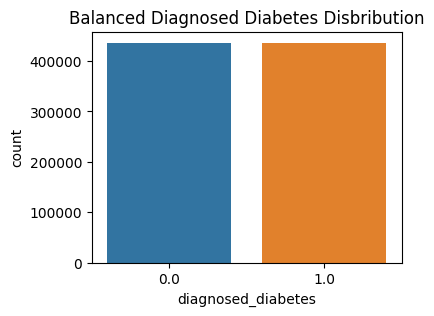

In [38]:
# trainDF[CFG.targetCol].astype(int).value_counts().plot(kind="bar", title="Diagnosed Diabetes Class");
plt.figure(figsize=(4,3))
sns.countplot(data=trainDF_balanced, x=CFG.targetCol)
plt.title("Balanced Diagnosed Diabetes Disbribution")
plt.show()


# Train Test Dataset Split

In [39]:
featureCols = [c for c in trainDF_balanced.columns if c not in [CFG.idCol , CFG.targetCol]]
print(featureCols)

X = trainDF_balanced[featureCols].copy()
y = trainDF_balanced[CFG.targetCol].astype(int) 

['age', 'alcohol_consumption_per_week', 'physical_activity_minutes_per_week', 'diet_score', 'sleep_hours_per_day', 'screen_time_hours_per_day', 'bmi', 'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate', 'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol', 'triglycerides', 'gender', 'ethnicity', 'education_level', 'income_level', 'smoking_status', 'employment_status', 'family_history_diabetes', 'hypertension_history', 'cardiovascular_history', 'MAP', 'Pulse_Pressure', 'Non_HDL', 'Total_HDL_Ratio', 'TG_HDL_Ratio', 'Metabolic_Syndrome_Index', 'Active_Balance']


In [40]:
# Train/Test split 
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=y)

In [41]:
X_train.shape  , X_test.shape,  y_train.shape,  y_test.shape

((698091, 31), (174523, 31), (698091,), (174523,))

In [42]:

model1 = xgb.XGBClassifier(
    objective="binary:logistic",
    eval_metric="auc",
    n_estimators=3500,
    learning_rate = 8e-3,
    max_depth=5, 
    subsample=0.7,
    colsample_bytree=0.4,
    reg_lambda=2.0,
    random_state=42,
    treee_method='hist',
    early_stopping_rounds=200,
    n_jobs=4,
    verbose=1,
)
model1

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, device=None, early_stopping_rounds=200,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.008, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=3500, n_jobs=4,
              num_parallel_tree=None, random_state=42, ...)

In [43]:
model1.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=True)

[0]	validation_0-auc:0.58614


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [13:57:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "treee_method", "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


[1]	validation_0-auc:0.62863
[2]	validation_0-auc:0.62518
[3]	validation_0-auc:0.63477
[4]	validation_0-auc:0.66281
[5]	validation_0-auc:0.66015
[6]	validation_0-auc:0.65561
[7]	validation_0-auc:0.67672
[8]	validation_0-auc:0.68093
[9]	validation_0-auc:0.68771
[10]	validation_0-auc:0.68530
[11]	validation_0-auc:0.68708
[12]	validation_0-auc:0.68763
[13]	validation_0-auc:0.68788
[14]	validation_0-auc:0.68610
[15]	validation_0-auc:0.68711
[16]	validation_0-auc:0.69009
[17]	validation_0-auc:0.68964
[18]	validation_0-auc:0.68884
[19]	validation_0-auc:0.68984
[20]	validation_0-auc:0.69022
[21]	validation_0-auc:0.69092
[22]	validation_0-auc:0.68994
[23]	validation_0-auc:0.69018
[24]	validation_0-auc:0.68994
[25]	validation_0-auc:0.69110
[26]	validation_0-auc:0.69073
[27]	validation_0-auc:0.68981
[28]	validation_0-auc:0.69018
[29]	validation_0-auc:0.69129
[30]	validation_0-auc:0.69102
[31]	validation_0-auc:0.69098
[32]	validation_0-auc:0.69063
[33]	validation_0-auc:0.69154
[34]	validation_0-a

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, device=None, early_stopping_rounds=200,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.008, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=3500, n_jobs=4,
              num_parallel_tree=None, random_state=42, ...)

# Evaluation

In [44]:
predictProb = model1.predict_proba(X_test)[:, 1]
predict = model1.predict(X_test)
auc = roc_auc_score(y_test, predictProb)
print(f"Validation AUC: {auc:.5f}")

Validation AUC: 0.72905


Accurary Score for XGBoost:  0.6646974897291474

Confusion matrix for XGBoost:
 [[61258 26004]
 [32514 54747]]

Classification Report For XGBoost :
               precision    recall  f1-score   support

           0       0.65      0.70      0.68     87262
           1       0.68      0.63      0.65     87261

    accuracy                           0.66    174523
   macro avg       0.67      0.66      0.66    174523
weighted avg       0.67      0.66      0.66    174523



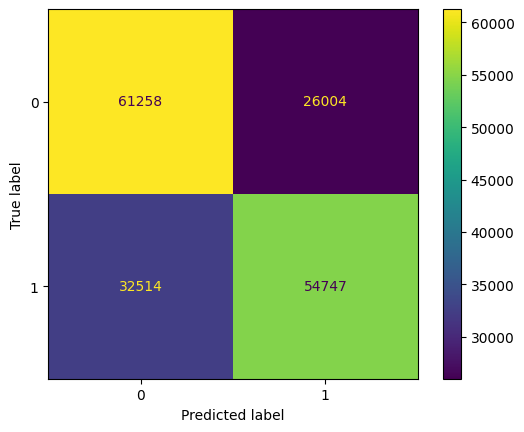

In [45]:
print("Accurary Score for XGBoost: ", accuracy_score(y_test, predict))
cm = confusion_matrix(y_test, predict)
report = classification_report(y_test, predict)
print('\n\rConfusion matrix for XGBoost:\n\r', cm)
print("\n\rClassification Report For XGBoost :\n\r", report)
xgbCMD=  ConfusionMatrixDisplay(cm)#.plot(ax=axs[0, 0]) 
xgbCMD.plot();
#     axs[0, 0].title.set_text("Confusion Matrix Random Forest")

In [46]:
finalPredictProb = model1.predict_proba(testDF[featureCols])[:, 1]

In [47]:
sub = pd.DataFrame()
sub["id"] = submit['id']
sub["diagnosed_diabetes"] = finalPredictProb

In [48]:
# sub = sub.loc["id", "diagnosed_diabetes"]
sub

,id,diagnosed_diabetes
0,700000,0.390768
1,700001,0.577034
2,700002,0.659896
3,700003,0.304686
4,700004,0.864215
...,...,...
299995,999995,0.611919
299996,999996,0.550203
299997,999997,0.450219
299998,999998,0.486427


In [49]:
sub.to_csv("submission.csv", index=False)

In [ ]:
# final = pd.read_csv("subumission.csv")
# final